In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import math



In [63]:
df_testo=pd.read_csv("test_FewQE9B.csv")
df_test=pd.read_csv("test_FewQE9B.csv")
df_train = pd.read_csv("train_XnW6LSF.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [8]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
df_train.loc[df_train["Item_Type"]=='Household'].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440


In [10]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
df_train['Item_Identifier'].str[:2].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})[:2]


0      Food
1    Drinks
Name: Item_Identifier, dtype: object

In [13]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Feature Engineering (Preprocessing the data)

In [14]:
# Filling missing values

def newdata(data):
    #Fillin Item Wieght with Median value, so if outliers present it doesn't affect much
    data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)
    #Filling Outlet Size NA values with Mode
    data['Outlet_Size'].fillna(data['Item_Weight'].mode(),inplace=True)
    
    # Item Identifier extracting first 2 char and expanding it
    data['Item_Identifier']=data['Item_Identifier'].str[:2].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
    #data['Item_Identifier']=data['Item_Identifier'].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
    
    # Replacing Fat content with consitent code
    data['Item_Fat_Content']=data["Item_Fat_Content"].replace({"LF":'Low Fat',"reg":"Regular","low fat":"Low Fat"})
    
    # One hot Encoding for categorical variable
    ''''
    Item_Identifier_dummies = pd.get_dummies(data.Item_Identifier)
    Item_Fat_Content_dummies = pd.get_dummies(data.Item_Fat_Content)
    Item_Type_dummies = pd.get_dummies(data.Item_Type)
    Outlet_Identifier_dummies = pd.get_dummies(data.Outlet_Identifier)
    Outlet_Size_dummies = pd.get_dummies(data.Outlet_Size)
    Outlet_Location_Type_dummies = pd.get_dummies(data.Outlet_Location_Type)
    Outlet_Type_dummies = pd.get_dummies(data.Outlet_Type)
    '''
    
    dummie = pd.get_dummies(data,columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
    
    
    #newdf = pd.concat([dummie,data['Item_Weight'],data['Item_Visibility'],data['Item_MRP'],data['Outlet_Establishment_Year'],data['Item_Outlet_Sales']],axis=1)
    
    return dummie
    
    
    

In [15]:
df=newdata(df_train)

In [16]:
Test_File =newdata(df_test)

In [17]:
df.shape,Test_File.shape

((8523, 46), (5681, 45))

In [18]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_Non-Consumable', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identif

In [19]:
Test_File.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_Drinks',
       'Item_Identifier_Food', 'Item_Identifier_Non-Consumable',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_

In [20]:
# splitting the data into independent & dependent
X=df.drop(['Item_Outlet_Sales'],axis=1)
Y=df['Item_Outlet_Sales']

In [21]:
X.shape, Y.shape

((8523, 45), (8523,))

**Splitting the dataset using train_test_split**

In [22]:
# Splitting the data into train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

### Making Neural Network Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [26]:
# define number of output neurons
output_neurons = 1

# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 40
neuron_hidden_layer_2 = 20

# defining input neurons
input_neurons = X_train.shape[1]

**Model 1 with normal parmaters**

In [67]:
#defining architecture 1
model = Sequential()

model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1840      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


In [29]:

'''
from keras import backend as b
def rmse(y_true, y_pred):
    return b.sqrt(b.mean(b.square(y_pred - y_true)))
'''



'\nfrom keras import backend as b\ndef rmse(y_true, y_pred):\n    return b.sqrt(b.mean(b.square(y_pred - y_true)))\n'

In [30]:
#model compile

from keras import metrics
model.compile(loss='mse',optimizer='Adam',metrics=['mean_squared_error'],)

In [31]:
#Training the model
model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=250)

Epoch 1/250
200/200 [==============================] - 3s 8ms/step - loss: 5094362.5000 - mean_squared_error: 5094362.5000 - val_loss: 2804176.5000 - val_mean_squared_error: 2804176.5000
Epoch 2/250
200/200 [==============================] - 1s 5ms/step - loss: 2724675.2500 - mean_squared_error: 2724675.2500 - val_loss: 2658250.7500 - val_mean_squared_error: 2658250.7500
Epoch 3/250
200/200 [==============================] - 1s 5ms/step - loss: 2535075.0000 - mean_squared_error: 2535075.0000 - val_loss: 2417522.5000 - val_mean_squared_error: 2417522.5000
Epoch 4/250
200/200 [==============================] - 1s 5ms/step - loss: 2257121.5000 - mean_squared_error: 2257121.5000 - val_loss: 2127492.7500 - val_mean_squared_error: 2127492.7500
Epoch 5/250
200/200 [==============================] - 1s 5ms/step - loss: 2025899.3750 - mean_squared_error: 2025899.3750 - val_loss: 1972673.5000 - val_mean_squared_error: 1972673.5000
Epoch 6/250
200/200 [==============================] - 1s 5ms/ste

Epoch 88/250
200/200 [==============================] - 1s 5ms/step - loss: 1207873.2500 - mean_squared_error: 1207873.2500 - val_loss: 1231848.7500 - val_mean_squared_error: 1231848.7500
Epoch 89/250
200/200 [==============================] - 1s 5ms/step - loss: 1212579.7500 - mean_squared_error: 1212579.7500 - val_loss: 1291014.5000 - val_mean_squared_error: 1291014.5000
Epoch 90/250
200/200 [==============================] - 1s 5ms/step - loss: 1205765.8750 - mean_squared_error: 1205765.8750 - val_loss: 1197740.8750 - val_mean_squared_error: 1197740.8750
Epoch 91/250
200/200 [==============================] - 1s 5ms/step - loss: 1205103.8750 - mean_squared_error: 1205103.8750 - val_loss: 1194009.3750 - val_mean_squared_error: 1194009.3750
Epoch 92/250
200/200 [==============================] - 1s 5ms/step - loss: 1209683.2500 - mean_squared_error: 1209683.2500 - val_loss: 1206228.7500 - val_mean_squared_error: 1206228.7500
Epoch 93/250
200/200 [==============================] - 1s 5

200/200 [==============================] - 1s 5ms/step - loss: 1188105.8750 - mean_squared_error: 1188105.8750 - val_loss: 1187524.3750 - val_mean_squared_error: 1187524.3750
Epoch 175/250
200/200 [==============================] - 1s 5ms/step - loss: 1176622.2500 - mean_squared_error: 1176622.2500 - val_loss: 1209201.6250 - val_mean_squared_error: 1209201.6250
Epoch 176/250
200/200 [==============================] - 1s 5ms/step - loss: 1178984.2500 - mean_squared_error: 1178984.2500 - val_loss: 1175752.3750 - val_mean_squared_error: 1175752.3750
Epoch 177/250
200/200 [==============================] - 1s 5ms/step - loss: 1178990.2500 - mean_squared_error: 1178990.2500 - val_loss: 1181900.0000 - val_mean_squared_error: 1181900.0000
Epoch 178/250
200/200 [==============================] - 1s 5ms/step - loss: 1174272.3750 - mean_squared_error: 1174272.3750 - val_loss: 1177556.2500 - val_mean_squared_error: 1177556.2500
Epoch 179/250
200/200 [==============================] - 1s 5ms/step 

In [35]:
# calculating the rmse for train file model
train_pred=model.predict(X_test)
rmse=math.sqrt(mean_squared_error(train_pred,Y_test))
rmse

67/67 [==============================] - 0s 3ms/step


1081.5415820273124

In [32]:
# getting predictions for the Test file set
prediction = model.predict(Test_File)

178/178 [==============================] - 1s 3ms/step


In [36]:
prediction

array([[1782.4058],
       [1459.6144],
       [ 747.7711],
       ...,
       [1784.9337],
       [3766.6917],
       [1195.8699]], dtype=float32)

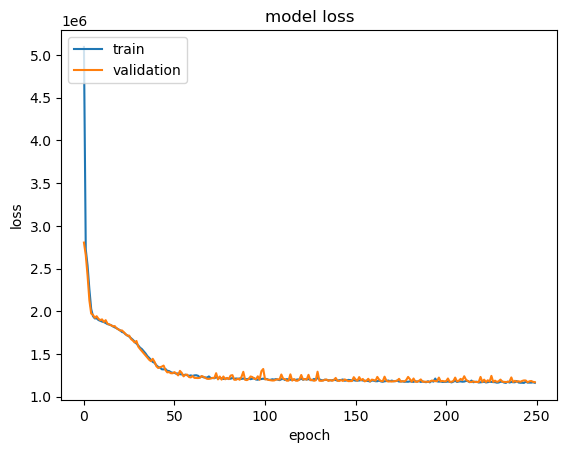

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

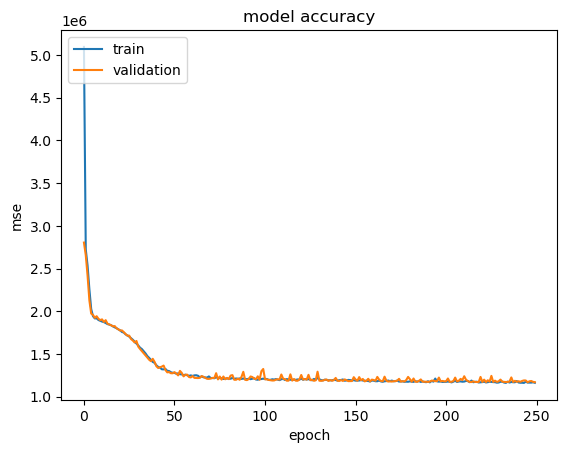

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Model 2 by making the parameters regularize (l2) & using dropout**

In [39]:
#using regularization and dropout
from keras.layers.core import Dense , Dropout
from keras import regularizers

In [40]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units = neuron_hidden_layer_1, activation = "relu", input_dim = input_neurons,activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = neuron_hidden_layer_1, activation = "relu"))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = output_neurons,  activation = "linear"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                1840      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [42]:
from keras import metrics
model.compile(loss='mse',optimizer='Adam',metrics=['mean_squared_error'],)

In [43]:
model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=250)

Epoch 1/250
200/200 [==============================] - 3s 8ms/step - loss: 3652034.5000 - mean_squared_error: 3629973.7500 - val_loss: 2811455.7500 - val_mean_squared_error: 2788863.5000
Epoch 2/250
200/200 [==============================] - 1s 5ms/step - loss: 2966161.2500 - mean_squared_error: 2945082.2500 - val_loss: 2676520.2500 - val_mean_squared_error: 2656641.5000
Epoch 3/250
200/200 [==============================] - 1s 5ms/step - loss: 2792114.2500 - mean_squared_error: 2774558.5000 - val_loss: 2549425.0000 - val_mean_squared_error: 2534268.5000
Epoch 4/250
200/200 [==============================] - 1s 5ms/step - loss: 2618728.7500 - mean_squared_error: 2605174.5000 - val_loss: 2284168.7500 - val_mean_squared_error: 2272231.7500
Epoch 5/250
200/200 [==============================] - 1s 5ms/step - loss: 2386251.7500 - mean_squared_error: 2376432.0000 - val_loss: 2089788.0000 - val_mean_squared_error: 2081590.6250
Epoch 6/250
200/200 [==============================] - 1s 5ms/ste

Epoch 88/250
200/200 [==============================] - 1s 5ms/step - loss: 1389291.5000 - mean_squared_error: 1389136.1250 - val_loss: 1175167.3750 - val_mean_squared_error: 1175000.8750
Epoch 89/250
200/200 [==============================] - 1s 4ms/step - loss: 1364428.3750 - mean_squared_error: 1364270.6250 - val_loss: 1173984.5000 - val_mean_squared_error: 1173816.8750
Epoch 90/250
200/200 [==============================] - 1s 5ms/step - loss: 1400518.6250 - mean_squared_error: 1400359.2500 - val_loss: 1186780.3750 - val_mean_squared_error: 1186623.5000
Epoch 91/250
200/200 [==============================] - 1s 5ms/step - loss: 1399143.0000 - mean_squared_error: 1398991.0000 - val_loss: 1179733.7500 - val_mean_squared_error: 1179579.3750
Epoch 92/250
200/200 [==============================] - 1s 5ms/step - loss: 1400067.6250 - mean_squared_error: 1399911.6250 - val_loss: 1223486.1250 - val_mean_squared_error: 1223338.5000
Epoch 93/250
200/200 [==============================] - 1s 5

200/200 [==============================] - 1s 5ms/step - loss: 1388888.7500 - mean_squared_error: 1388686.8750 - val_loss: 1179421.0000 - val_mean_squared_error: 1179216.5000
Epoch 175/250
200/200 [==============================] - 1s 5ms/step - loss: 1388215.6250 - mean_squared_error: 1388012.6250 - val_loss: 1315929.1250 - val_mean_squared_error: 1315761.5000
Epoch 176/250
200/200 [==============================] - 1s 5ms/step - loss: 1404109.7500 - mean_squared_error: 1403901.2500 - val_loss: 1206634.7500 - val_mean_squared_error: 1206439.6250
Epoch 177/250
200/200 [==============================] - 1s 5ms/step - loss: 1369154.6250 - mean_squared_error: 1368953.7500 - val_loss: 1169405.2500 - val_mean_squared_error: 1169211.7500
Epoch 178/250
200/200 [==============================] - 1s 5ms/step - loss: 1370238.2500 - mean_squared_error: 1370055.6250 - val_loss: 1168579.8750 - val_mean_squared_error: 1168385.5000
Epoch 179/250
200/200 [==============================] - 1s 5ms/step 

In [44]:
# calculating the rmse for train file model
train_pred=model.predict(X_test)
rmse=math.sqrt(mean_squared_error(train_pred,Y_test))
rmse

67/67 [==============================] - 0s 3ms/step


1079.6038129338676

In [45]:
# getting predictions for the test file set
predict = model.predict(Test_File)

178/178 [==============================] - 1s 3ms/step


In [46]:
predict

array([[1877.1039 ],
       [1550.3387 ],
       [ 906.53595],
       ...,
       [1854.0043 ],
       [3736.157  ],
       [1298.6605 ]], dtype=float32)

**We can observe that RMSE is value decrese After regularizing and dropout**

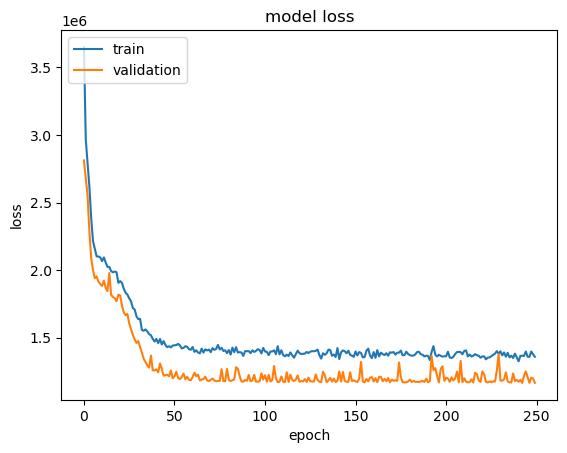

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

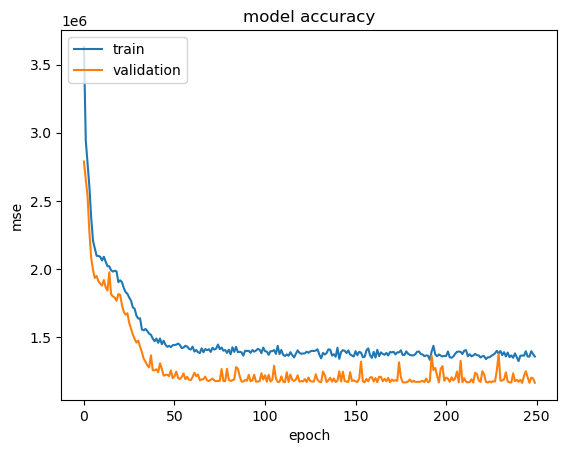

In [48]:
# summarize history for accuracy
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Saving the prediction values generated using Test file input in Data Frame & CSV 

In [64]:
preds = pd.DataFrame()
preds['Item_Identifier'] = df_testo['Item_Identifier']
preds['Outlet_Identifier'] = df_testo['Outlet_Identifier']
preds['Item_Outlet_Sales']= predict


In [65]:
preds

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1877.103882
1,FDW14,OUT017,1550.338745
2,NCN55,OUT010,906.535950
3,FDQ58,OUT017,2709.673096
4,FDY38,OUT027,5523.046875
...,...,...,...
5676,FDB58,OUT046,2360.654053
5677,FDD47,OUT018,2593.765625
5678,NCO17,OUT045,1854.004272
5679,FDJ26,OUT017,3736.156982


In [66]:
preds.to_csv(r'path_\submission_predictions_1_using_Keras.csv', index=False,header=True)